In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.ticker as ticker
from tabulate import tabulate

In [5]:
# read in file
file_path = '261102387_按序号_医学数据挖掘实用技术课程Chatbot使用反馈调查_32_32.xlsx'
df = pd.read_excel(file_path)

5、我熟悉大语言模型的应用产品，如文心一言、通义千问、智谱清言、ChatGPT、New Bing等?       1.322581
6、我理解像ChatGPT这样的生成式AI技术在处理复杂任务时有其局限性。                    4.225806
7、我理解像ChatGPT这样的生成式AI技术可能产生事实上不准确的输出。                    4.354839
8、我理解像ChatGPT这样的生成式AI技术可能产生脱离上下文或不适当的输出。                 4.129032
9、我理解像ChatGPT这样的生成式AI技术在输出中可能表现出偏见和不公平。                  3.645161
10、我理解像ChatGPT这样的生成式AI技术可能过度依赖统计数据，这在某些情境中可能限制了它们的用途。    3.870968
11、我理解像ChatGPT这样的生成式AI技术在情感智能和同理心方面有限，这可能导致输出不敏感或不适当。    3.677419
dtype: float64
5、我熟悉大语言模型的应用产品，如文心一言、通义千问、智谱清言、ChatGPT、New Bing等?       0.475191
6、我理解像ChatGPT这样的生成式AI技术在处理复杂任务时有其局限性。                    0.560338
7、我理解像ChatGPT这样的生成式AI技术可能产生事实上不准确的输出。                    0.550659
8、我理解像ChatGPT这样的生成式AI技术可能产生脱离上下文或不适当的输出。                 0.618705
9、我理解像ChatGPT这样的生成式AI技术在输出中可能表现出偏见和不公平。                  0.877435
10、我理解像ChatGPT这样的生成式AI技术可能过度依赖统计数据，这在某些情境中可能限制了它们的用途。    0.805892
11、我理解像ChatGPT这样的生成式AI技术在情感智能和同理心方面有限，这可能导致输出不敏感或不适当。    0.652538
dtype: float64


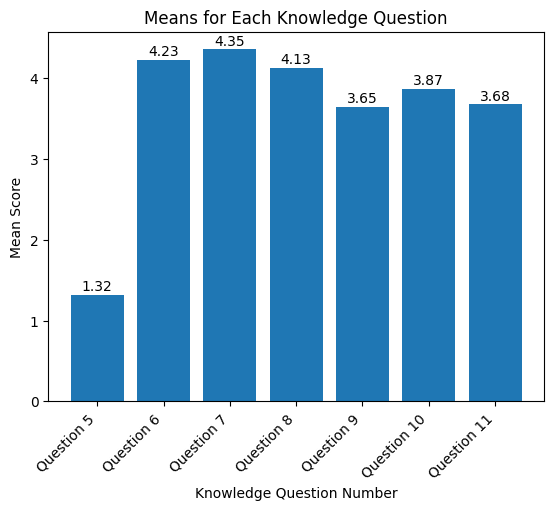

In [6]:
# knowledge questions q5-q11
columns_knowledge_llm = df.iloc[:, 10:17]
knowledge_means = columns_knowledge_llm.mean()
knowledge_sd = columns_knowledge_llm.std()
print(knowledge_means)
print(knowledge_sd)

# knowledge_means.plot(kind='bar')
column_new_names = [f'Question {i}' for i in range(5, 12)]

fig, ax = plt.subplots()
ax.bar(column_new_names, knowledge_means)

# Add values on top of each bar
for index, value in enumerate(knowledge_means):
    ax.text(index, value + 0.05, f'{value:.2f}', ha='center')

plt.xlabel('Knowledge Question Number')
plt.ylabel('Mean Score')
plt.title('Means for Each Knowledge Question')
plt.xticks(range(len(knowledge_means)), column_new_names)
plt.xticks(rotation=45, ha='right')
plt.show()

knowledge_score_sum = columns_knowledge_llm.sum(axis=1)
knowledge_score_mean = knowledge_score_sum.mean()
# print(columns_knowledge_llm)
# print(knowledge_score_sum)
# print(knowledge_score_mean)

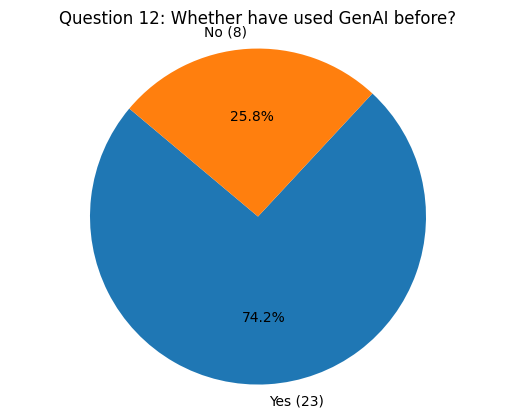

In [7]:
# The relationship between q12 and q13
whether_used_genai = df.iloc[:, 17]
labels = ['Yes', 'No']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    whether_used_genai.value_counts(), autopct='%1.1f%%', startangle=140, 
    labels=[f'{category} ({value})' for category, value in zip(labels, whether_used_genai.value_counts())],)

# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)

# for i, autotext in enumerate(autotexts):
#     autotext.set_text(f'{labels[i]} ({whether_used_genai.value_counts().iloc[i]})')
# for i, wedge in enumerate(wedges):
#     ax.text(wedge.get_center()[0] * 1.5, wedge.get_center()[1] * 1.5, f'{labels[i]} ({whether_used_genai.value_counts().iloc[i]:.2f})',
#             ha='center', va='center', fontsize=12)

# Customize labels and percentages
# for i, wedge in enumerate(wedges):
#     # angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
#     # y = np.sin(np.deg2rad(angle))
#     # x = np.cos(np.deg2rad(angle))

#     # if y > 0.98:
#     #     y += 0.05
    
#     # horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     # connectionstyle = "angle,angleA=0,angleB={}".format(angle)

#     # print(value_counts[i])
    
#     ax.annotate(f'{labels[i]} ({whether_used_genai.value_counts().iloc[i]})',
#                 xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
#                 fontsize=10)
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Question 12: Whether have used GenAI before?')
plt.show()



13、您在课程中使用过编程辅助Chatbot吗?
1    23
2     8
Name: count, dtype: int64


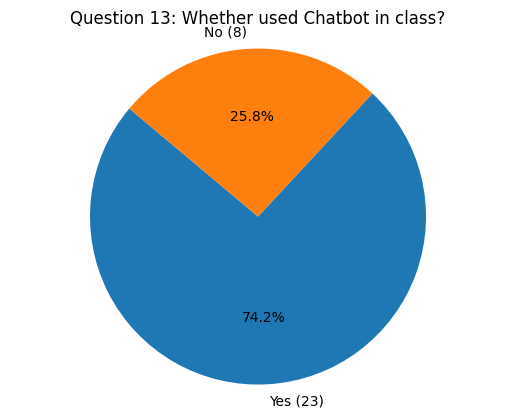

13、您在课程中使用过编程辅助Chatbot吗?   1  2
12、在本课程之前是否使用过生成式AI产品?         
1                         17  6
2                          6  2
Chi-squared statistic: 0.0
1
P-value: 1.0
Fail to reject the null hypothesis: No significant association between the variables.


In [8]:
whether_used_chat2r = df.iloc[:, 18]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    whether_used_chat2r.value_counts(), autopct='%1.1f%%', startangle=140, 
    labels=[f'{category} ({value})' for category, value in zip(labels, whether_used_chat2r.value_counts())],)
ax.axis('equal')
plt.title('Question 13: Whether used Chatbot in class?')
print(whether_used_chat2r.value_counts())
# plt.pie(whether_used_chat2r.value_counts(), labels=['Yes', 'No'])
plt.show()

contingency_table = pd.crosstab(whether_used_genai, whether_used_chat2r)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(dof)
print(f"P-value: {p}")
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: No significant association between the variables.")

1     3.0
3     3.0
5     2.0
6     2.0
7     3.0
9     2.0
10    3.0
11    3.0
12    2.0
13    2.0
14    2.0
15    2.0
17    3.0
18    2.0
19    2.0
20    2.0
22    3.0
23    3.0
24    2.0
25    3.0
27    2.0
29    3.0
30    2.0
Name: 14、您使用Chatbot的频率是:（每天/每周/每月/偶尔）, dtype: float64
14、您使用Chatbot的频率是:（每天/每周/每月/偶尔）
2.0    13
3.0    10
Name: count, dtype: int64


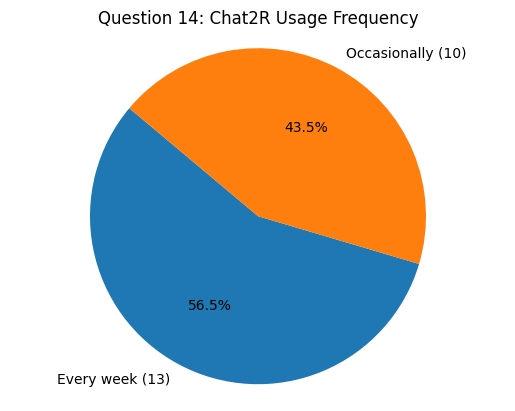

15、您认为Chatbot的界面易于操作吗?
2.0    14
1.0     8
3.0     1
Name: count, dtype: int64


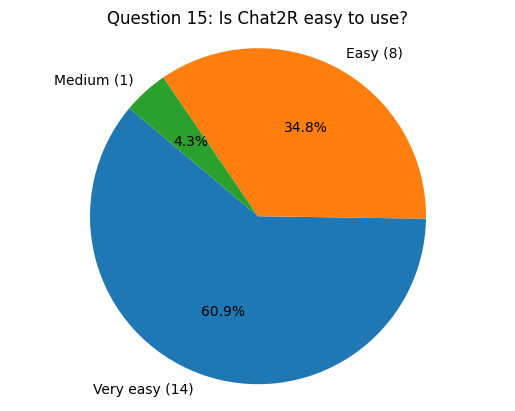

Chi-squared statistic: 2.6538461538461537
P-value: 0.2652922907368593
dof: 2
Fail to reject the null hypothesis: No significant association between the variables.


In [9]:
#q14-15
chat2r_use_f = df.iloc[:, 19].dropna()
print(chat2r_use_f)
labels=['Every week', 'Occasionally']
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    chat2r_use_f.value_counts(), autopct='%1.1f%%', startangle=140, 
    labels=[f'{category} ({value})' for category, value in zip(labels, chat2r_use_f.value_counts())],)
ax.axis('equal')
plt.title('Question 14: Chat2R Usage Frequency')
print(chat2r_use_f.value_counts())
# plt.pie(chat2r_use_f.value_counts(), labels=['Every week', 'Sometimes'])
plt.show()

whether_easy_to_use = df.iloc[:, 20].dropna()
labels=['Very easy', 'Easy', 'Medium']
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    whether_easy_to_use.value_counts(), autopct='%1.1f%%', startangle=140, 
    labels=[f'{category} ({value})' for category, value in zip(labels, whether_easy_to_use.value_counts())],)
ax.axis('equal')
plt.title('Question 15: Is Chat2R easy to use?')
print(whether_easy_to_use.value_counts())
# plt.pie(whether_easy_to_use.value_counts().sort_index(), labels=['Very easy', 'Easy', 'Medium'])
plt.show()

contingency_table = pd.crosstab(chat2r_use_f, whether_easy_to_use)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"dof: {dof}")
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: No significant association between the variables.")

15
Very willing
Willing
Medium
Not Willing


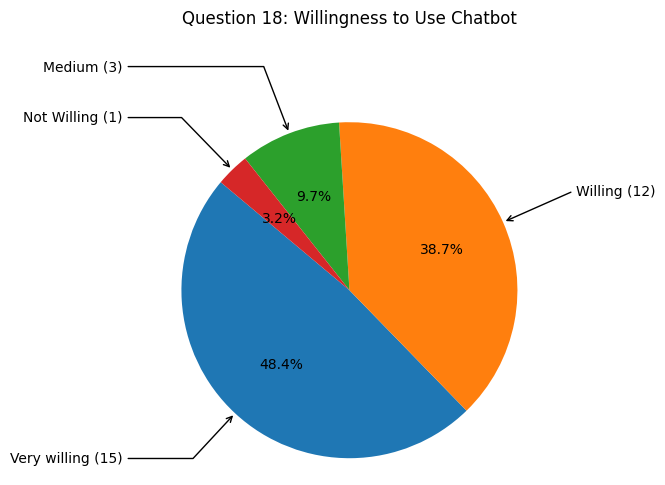

In [10]:
# q16-18
# eliminate rows where participants did not use chat2r
willingness_preselect = df[df.iloc[:, 18] != 2]
willingness_16_to_18 = willingness_preselect.iloc[:, [21, 22, 23]]
# print(willingness_16_to_18)


#q18
willingness_chat2r = df.iloc[:, 23]

value_counts = willingness_chat2r.value_counts()
print(value_counts[5])

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(willingness_chat2r.value_counts(), autopct='%1.1f%%', startangle=140)
labels = ['Very willing', 'Willing', 'Medium', 'Not Willing']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Question 18: Willingness to Use Chatbot', y=1.2)
plt.show()

18、我愿意将Chatbot作为课程的常规学习工具。
5    4
4    3
2    1
Name: count, dtype: int64
Very willing
Willing
Not willing


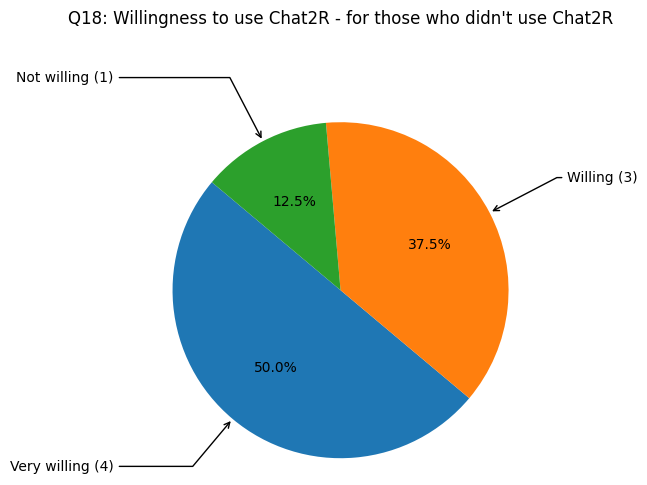

In [11]:
# q18 willingness to use chat2r - for those who didn't use chat2r
willingness_chat2r_not_used = df[df.iloc[:, 18] == 2].iloc[:, 23]
print(willingness_chat2r_not_used.value_counts())

value_counts = willingness_chat2r_not_used.value_counts()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140)
labels = ['Very willing', 'Willing', 'Not willing']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Q18: Willingness to use Chat2R - for those who didn\'t use Chat2R', y=1.2)
plt.show()

18、我愿意将Chatbot作为课程的常规学习工具。
5    11
4     9
3     3
Name: count, dtype: int64
Very willing
Willing
Medium


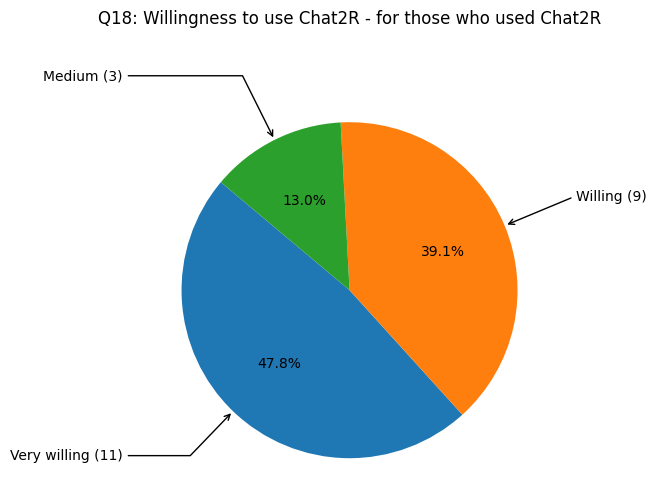

In [12]:
# q18 willingness to use chat2r - for those who used chat2r
willingness_chat2r_used = df[df.iloc[:, 18] == 1].iloc[:, 23]
print(willingness_chat2r_used.value_counts())

value_counts = willingness_chat2r_used.value_counts()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140)
labels = ['Very willing', 'Willing', 'Medium']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Q18: Willingness to use Chat2R - for those who used Chat2R', y=1.2)
plt.show()

In [13]:
# q13 vs q18 willingness to use chat2r
# Create a contingency table
contingency_table = pd.crosstab(df.iloc[:, 18], willingness_chat2r)
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

18、我愿意将Chatbot作为课程的常规学习工具。  2  3  4   5
13、您在课程中使用过编程辅助Chatbot吗?               
1                           0  3  9  11
2                           1  0  3   4
Chi-Square statistic: 3.928351449275363
P-value: 0.2693055394070809
Degrees of freedom: 3
Expected frequencies:
[[ 0.74193548  2.22580645  8.90322581 11.12903226]
 [ 0.25806452  0.77419355  3.09677419  3.87096774]]


16、您觉得Chatbot提供的功能对您学习有帮助吗?
1    12
2    18
3     1
Name: count, dtype: int64


/var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/ipykernel_34774/1666781001.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Very helpful", "Helpful", "Medium"], rotation=0)


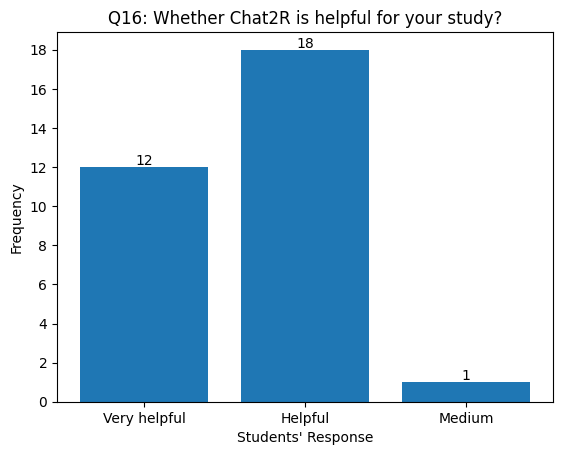

In [14]:
# q16 whether chatbot is helpful for study
whether_chat2r_helpful = df.iloc[:, 21]
# print(whether_chat2r_helpful)
value_counts = whether_chat2r_helpful.value_counts().sort_index()
print(value_counts)

labels = ['Very helpful', 'Helpful', 'Medium']

# Plot using matplotlib
# plt.figure(figsize=(10, 6))
# ax = value_counts.plot(kind='bar')
fig, ax = plt.subplots()
ax.bar(labels, value_counts)

# Add values on top of each bar
for index, value in enumerate(value_counts):
    ax.text(index, value + 0.1, str(value), ha='center')

ax.set_xlabel('Students\' Response')
ax.set_ylabel('Frequency')
ax.set_title('Q16: Whether Chat2R is helpful for your study?')
ax.set_xticklabels(["Very helpful", "Helpful", "Medium"], rotation=0)

# Ensure the y-axis uses integer ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))


0     2
2     1
4     2
8     2
16    2
21    3
26    2
28    2
Name: 16、您觉得Chatbot提供的功能对您学习有帮助吗?, dtype: int64
Very Helpful
Helpful
Medium


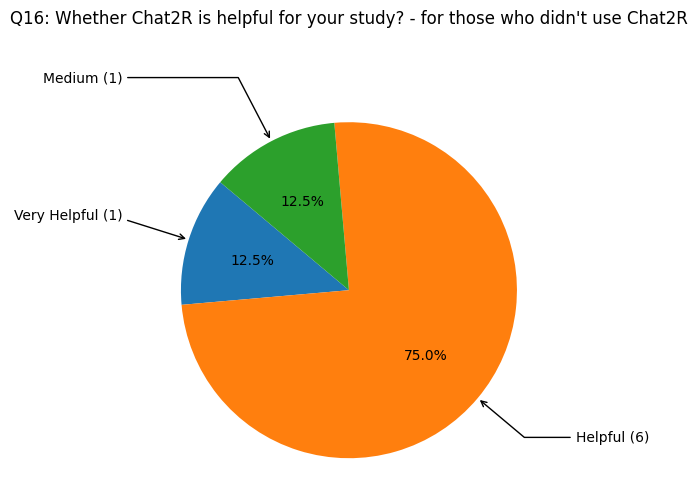

In [15]:
# q16 whether chatbot is helpful for study - for those who didn't use chat2r
whether_chat2r_helpful_not_used = df[df.iloc[:, 18] == 2].iloc[:, 21]
print(whether_chat2r_helpful_not_used)

value_counts = whether_chat2r_helpful_not_used.value_counts().sort_index()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140)
labels = ['Very Helpful', 'Helpful', 'Medium']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Q16: Whether Chat2R is helpful for your study? - for those who didn\'t use Chat2R', y=1.2)
plt.show()

1     1
3     2
5     2
6     2
7     2
9     1
10    2
11    2
12    1
13    1
14    1
15    2
17    1
18    1
19    2
20    1
22    1
23    2
24    1
25    2
27    2
29    2
30    1
Name: 16、您觉得Chatbot提供的功能对您学习有帮助吗?, dtype: int64
Very Helpful
Helpful


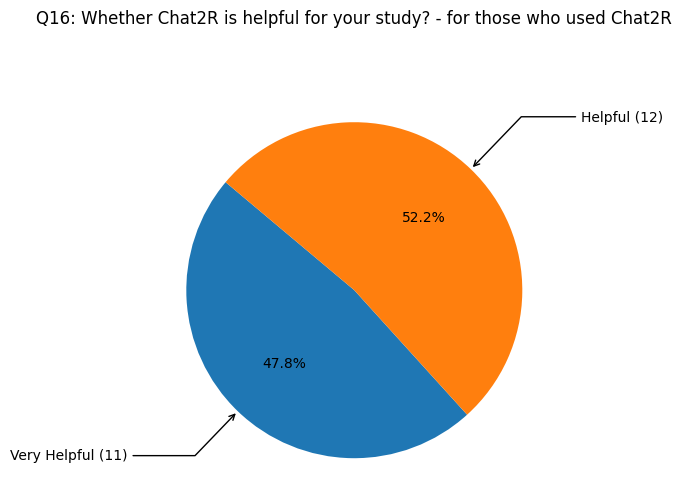

In [16]:
# q16 whether chatbot is helpful for study - for those who used chat2r
whether_chat2r_helpful_used = df[df.iloc[:, 18] == 1].iloc[:, 21]
print(whether_chat2r_helpful_used)

value_counts = whether_chat2r_helpful_used.value_counts().sort_index()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140)
labels = ['Very Helpful', 'Helpful', 'Medium']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Q16: Whether Chat2R is helpful for your study? - for those who used Chat2R', y=1.2)
plt.show()

In [17]:
# q13 whether used chat2r vs q16 whether it is helpful

# Create a contingency table
contingency_table = pd.crosstab(df.iloc[:, 18], whether_chat2r_helpful)
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
print("While the Chi-Square statistic indicates some level of discrepancy between the observed and expected frequencies, the p-value (0.0699) suggests that there is not enough evidence to conclude that there is a significant association between the two categorical variables at the 5% significance level. However, because the p-value is close to 0.05, this may warrant further investigation or a consideration of a larger sample size to clarify the relationship.")


16、您觉得Chatbot提供的功能对您学习有帮助吗?   1   2  3
13、您在课程中使用过编程辅助Chatbot吗?              
1                            11  12  0
2                             1   6  1
Chi-Square statistic: 5.3211050724637685
P-value: 0.06990958349328548
Degrees of freedom: 2
Expected frequencies:
[[ 8.90322581 13.35483871  0.74193548]
 [ 3.09677419  4.64516129  0.25806452]]
While the Chi-Square statistic indicates some level of discrepancy between the observed and expected frequencies, the p-value (0.0699) suggests that there is not enough evidence to conclude that there is a significant association between the two categorical variables at the 5% significance level. However, because the p-value is close to 0.05, this may warrant further investigation or a consideration of a larger sample size to clarify the relationship.


17、您对Chatbot的整体印象如何?
1    13
2    16
3     2
Name: count, dtype: int64


/var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/ipykernel_34774/2755343050.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Very Good", "Good", "Medium"], rotation=0)


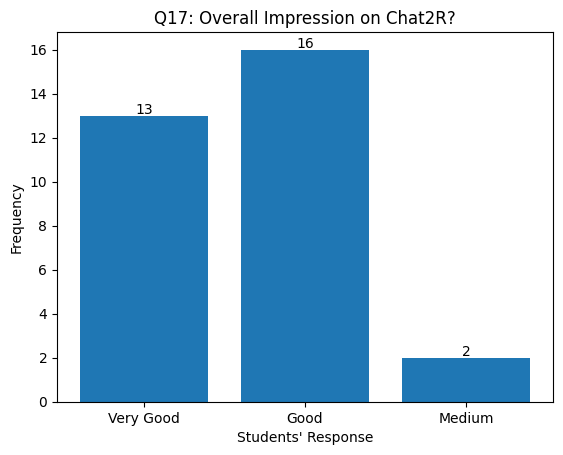

In [18]:
# q17 overall impression on chat2r
overall_impr_chat2r = df.iloc[:, 22]
# print(overall_impr_chat2r)

value_counts = overall_impr_chat2r.value_counts().sort_index()
print(value_counts)

labels = ["Very Good", "Good", "Medium"]
# Plot using matplotlib
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
# ax = value_counts.plot(kind='bar')
ax.bar(labels, value_counts)

for index, value in enumerate(value_counts):
    ax.text(index, value + 0.1, str(value), ha='center')

ax.set_xlabel('Students\' Response')
ax.set_ylabel('Frequency')
ax.set_title('Q17: Overall Impression on Chat2R?')
ax.set_xticklabels(["Very Good", "Good", "Medium"], rotation=0)

plt.show()


# Ensure the y-axis uses integer ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

0     1
2     1
4     1
8     2
16    2
21    3
26    1
28    3
Name: 17、您对Chatbot的整体印象如何?, dtype: int64
Very Good
Good
Medium


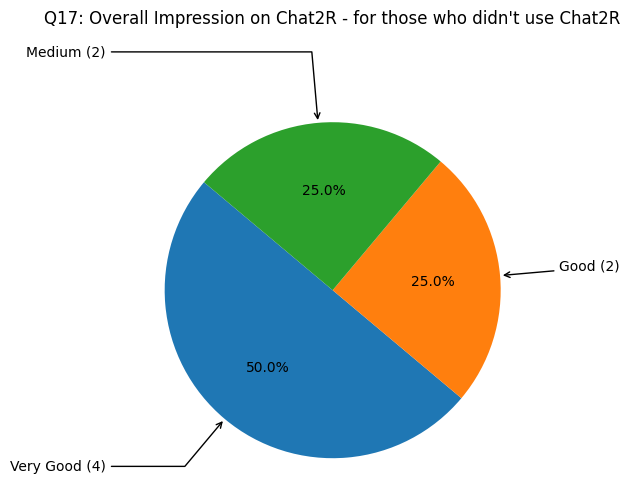

In [19]:
# q17 overall impression on chat2r - for those who didn't use chat2r
overall_impr_chat2r_not_used = df[df.iloc[:, 18] == 2].iloc[:, 22]
print(overall_impr_chat2r_not_used)

value_counts = overall_impr_chat2r_not_used.value_counts().sort_index()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140)
labels = ['Very Good', 'Good', 'Medium']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Q17: Overall Impression on Chat2R - for those who didn\'t use Chat2R', y=1.2)
plt.show()

1     1
3     1
5     2
6     2
7     2
9     1
10    2
11    2
12    2
13    1
14    1
15    1
17    1
18    2
19    2
20    2
22    1
23    2
24    2
25    2
27    2
29    2
30    1
Name: 17、您对Chatbot的整体印象如何?, dtype: int64
Very Good
Good


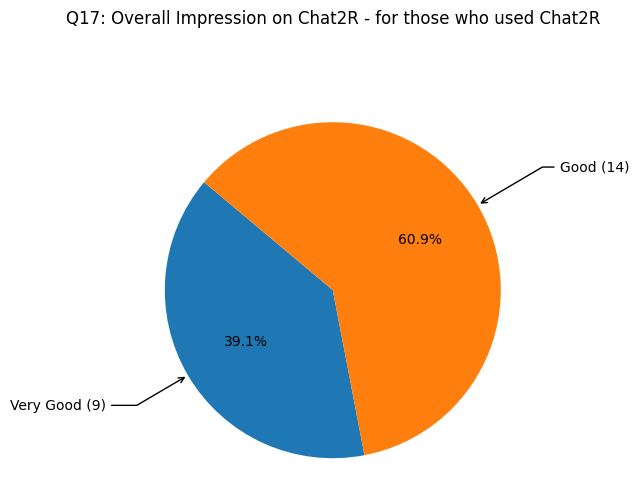

In [20]:
# q17 overall impression on chat2r - for those who didn't use chat2r
overall_impr_chat2r_used = df[df.iloc[:, 18] == 1].iloc[:, 22]
print(overall_impr_chat2r_used)

value_counts = overall_impr_chat2r_used.value_counts().sort_index()
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140)
labels = ['Very Good', 'Good', 'Medium']
# fig, ax = plt.subplots()
# wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140)


# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    # if y > 0.98:
    #     y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)

    print(labels[i])
    # print(value_counts[i])
    
    ax.annotate(f'{labels[i]} ({value_counts.iloc[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Q17: Overall Impression on Chat2R - for those who used Chat2R', y=1.2)
plt.show()

In [21]:
# q13 whether used chat2r vs q17 overall impression

# Create a contingency table
contingency_table = pd.crosstab(df.iloc[:, 18], overall_impr_chat2r)
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
print("There is a statistically significant association between the two variables.")

17、您对Chatbot的整体印象如何?      1   2  3
13、您在课程中使用过编程辅助Chatbot吗?          
1                         9  14  0
2                         4   2  2
Chi-Square statistic: 7.3968436454849495
P-value: 0.024762575382488508
Degrees of freedom: 2
Expected frequencies:
[[ 9.64516129 11.87096774  1.48387097]
 [ 3.35483871  4.12903226  0.51612903]]
There is a statistically significant association between the two variables.


Question 19 - Mean=4.161290322580645, SD=0.7347005827114602
Question 20 - Mean=3.6451612903225805, SD=0.6607262215055085
Question 21 - Mean=4.645161290322581, SD=0.4863734571139201
Question 22 - Mean=4.32258064516129, SD=0.6525384675349823
Question 23 - Mean=4.225806451612903, SD=0.5603378397214093
Question 24 - Mean=4.354838709677419, SD=0.7549122287513162


/var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/ipykernel_34774/97284920.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([name for name in column_new_names], rotation=45, ha='right')  # Set the new labels


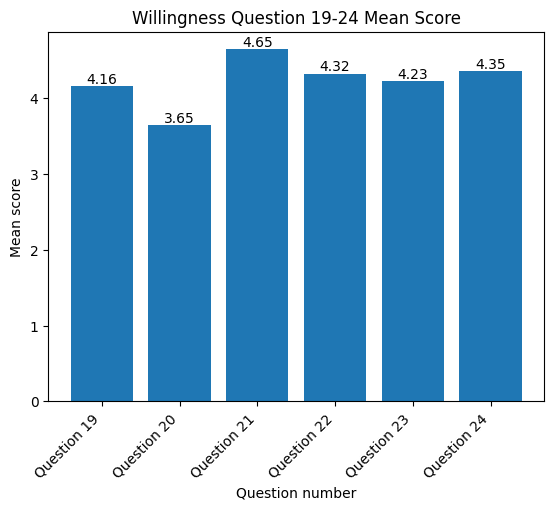

In [22]:
# GenAI willingness q19-24
for i in range(19, 25, 1):
    q = df.iloc[:, i + 5]
    print(f'Question {i} - Mean={q.mean()}, SD={q.std()}')

# plot all of them
genai_willingness = df.iloc[:, 24:30]
# print(genai_willingness)

willingness_mean = genai_willingness.mean()
willingness_sd = genai_willingness.std()
# print(willingness_sd)
# print(type(willingness_mean))
# print(willingness_mean)


# Create a bar plot
fig, ax = plt.subplots()
column_new_names = [f'Question {i}' for i in range(19, 25)]
values = willingness_mean.values
bars = ax.bar(willingness_mean.index, values)


# Add values on top of each bar
for bar, value in zip(bars, values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}', ha='center', va='bottom')

# Set new label names for categories
# ax.set_xticks(willingness_mean.index)  # Set the tick positions to the original category labels
ax.set_xticklabels([name for name in column_new_names], rotation=45, ha='right')  # Set the new labels

# Set title and labels
ax.set_title('Willingness Question 19-24 Mean Score')
ax.set_xlabel('Question number')
ax.set_ylabel('Mean score')

# Show plot
plt.show()

# willingness_mean.plot(kind='bar')
# column_new_names = [f'Question {i}' for i in range(19, 25)]
# plt.xlabel('Willingness Question Number')
# plt.ylabel('Mean Score')
# plt.title('Means for Each Willingness Question')
# plt.xticks(range(len(willingness_mean)), column_new_names)
# plt.xticks(rotation=45, ha='right')
# plt.show()


0     24
1     21
2     26
3     25
4     29
5     25
6     23
7     22
8     23
9     27
10    25
11    25
12    26
13    18
14    28
15    26
16    25
17    25
18    25
19    23
20    24
21    26
22    31
23    26
24    29
25    25
26    24
27    25
28    25
29    26
30    30
dtype: int64


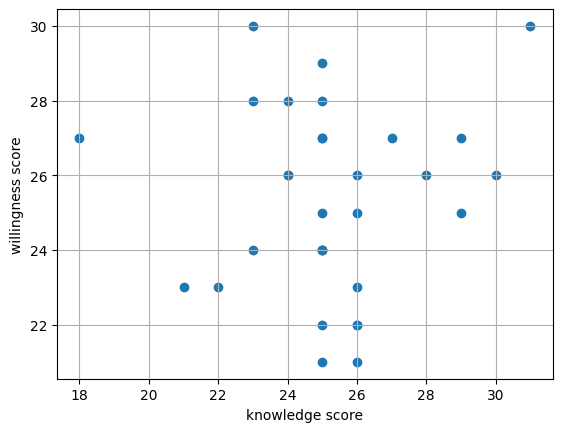

Pearson correlation coefficient: 0.09020122220619763
P-value: 0.6294035237787875


In [23]:
# columns_knowledge_llm q5-11 vs genai_willingness q19-24
knowledge_score_sum = columns_knowledge_llm.sum(axis=1)
knowledge_score_mean = knowledge_score_sum.mean()
willingness_score_sum = genai_willingness.sum(axis=1)
willingness_score_mean = willingness_score_sum.mean()

print(knowledge_score_sum)

plt.scatter(knowledge_score_sum, willingness_score_sum)
plt.xlabel('knowledge score')
plt.ylabel('willingness score')
plt.grid(True)
plt.show()

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(knowledge_score_sum, willingness_score_sum)

print("Pearson correlation coefficient:", corr)
print("P-value:", p_value)

In [24]:
# Translate majors to English
majors = df.iloc[:, 9]

eng_majors = []
for m in majors:
    if m == "内科学":
        eng_majors.append("Internal Medicine")
    elif m == "生物医学工程":
       eng_majors.append("Biomedical Engineering")
    elif m == "医学信息学":
       eng_majors.append("Medical Informatics")
    elif m == "影像医学与核医学":
       eng_majors.append("Imaging and Nuclear Medicine")
    elif m == "情报学":
       eng_majors.append("Information Science")
    elif m == "老年医学":
       eng_majors.append("Geriatrics")
    elif m == "公共卫生":
       eng_majors.append("Public Health")
    elif m == "护理":
       eng_majors.append("Nursing")
    elif m == "儿科":
       eng_majors.append("Pediatrics")
    elif m == "流行病与卫生统计学":
       eng_majors.append("Epidemiology and Health Statistics")
    elif m == "临床麻醉学":
       eng_majors.append("Clinical Anesthesiology")
    elif m == "中西医结合临床":
       eng_majors.append("Clinical Integration of Traditional Chinese and Western Medicine")
    elif m == "临床检验诊断学":
       eng_majors.append("Clinical Diagnostics")
    elif m == "临床医学":
       eng_majors.append("Clinical Medicine") 

print(eng_majors)

['Internal Medicine', 'Internal Medicine', 'Biomedical Engineering', 'Medical Informatics', 'Medical Informatics', 'Internal Medicine', 'Imaging and Nuclear Medicine', 'Information Science', 'Geriatrics', 'Medical Informatics', 'Public Health', 'Biomedical Engineering', 'Nursing', 'Pediatrics', 'Epidemiology and Health Statistics', 'Epidemiology and Health Statistics', 'Clinical Anesthesiology', 'Internal Medicine', 'Epidemiology and Health Statistics', 'Medical Informatics', 'Biomedical Engineering', 'Clinical Integration of Traditional Chinese and Western Medicine', 'Biomedical Engineering', 'Medical Informatics', 'Information Science', 'Information Science', 'Medical Informatics', 'Clinical Diagnostics', 'Clinical Diagnostics', 'Clinical Diagnostics', 'Clinical Medicine']


/var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/ipykernel_34774/1708788618.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{value_counts.index[i]} ({value_counts[i]})',


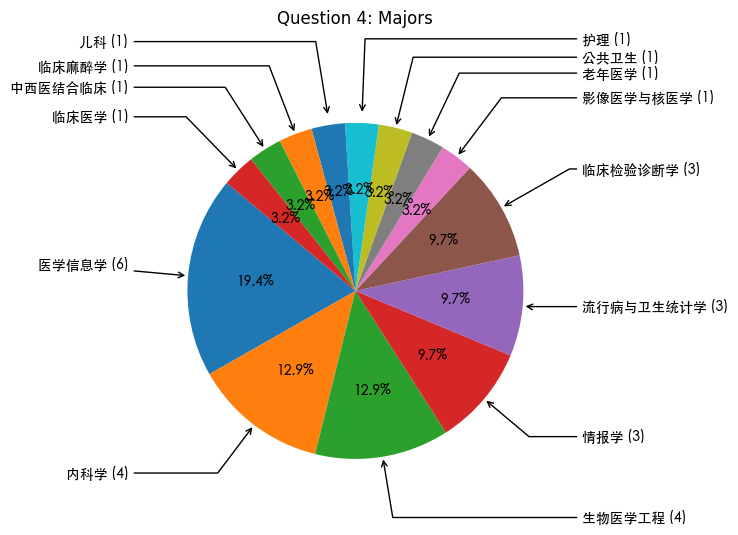

In [25]:
# q4 - majors
majors = df.iloc[:, 9]

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # Change this to the correct path on your system
font_prop = FontProperties(fname=font_path)




value_counts = majors.value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})

# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    if y > 0.98:
        y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    
    ax.annotate(f'{value_counts.index[i]} ({value_counts[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, fontproperties=font_prop,
                arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle, color='black'))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Question 4: Majors', y=1.2)
plt.show()

In [26]:
# Create a table for age, sex, and majors
age = df.iloc[:, 7]
sex = df.iloc[:, 8]
print(sex.value_counts())


table = tabulate(sex.value_counts().reset_index(), headers='keys', tablefmt='pipe', showindex=False)
print(table)


3、性别:
2    18
1    13
Name: count, dtype: int64
|   3、性别: |   count |
|-----------:|--------:|
|          2 |      18 |
|          1 |      13 |


0     24
1     21
2     26
3     25
4     29
5     25
6     23
7     22
8     23
9     27
10    25
11    25
12    26
13    18
14    28
15    26
16    25
17    25
18    25
19    23
20    24
21    26
22    31
23    26
24    29
25    25
26    24
27    25
28    25
29    26
30    30
dtype: int64
0           内科学
1           内科学
2        生物医学工程
3         医学信息学
4         医学信息学
5           内科学
6      影像医学与核医学
7           情报学
8          老年医学
9         医学信息学
10         公共卫生
11       生物医学工程
12           护理
13           儿科
14    流行病与卫生统计学
15    流行病与卫生统计学
16        临床麻醉学
17          内科学
18    流行病与卫生统计学
19        医学信息学
20       生物医学工程
21      中西医结合临床
22       生物医学工程
23        医学信息学
24          情报学
25          情报学
26        医学信息学
27      临床检验诊断学
28      临床检验诊断学
29      临床检验诊断学
30         临床医学
Name: 4、专业:, dtype: object


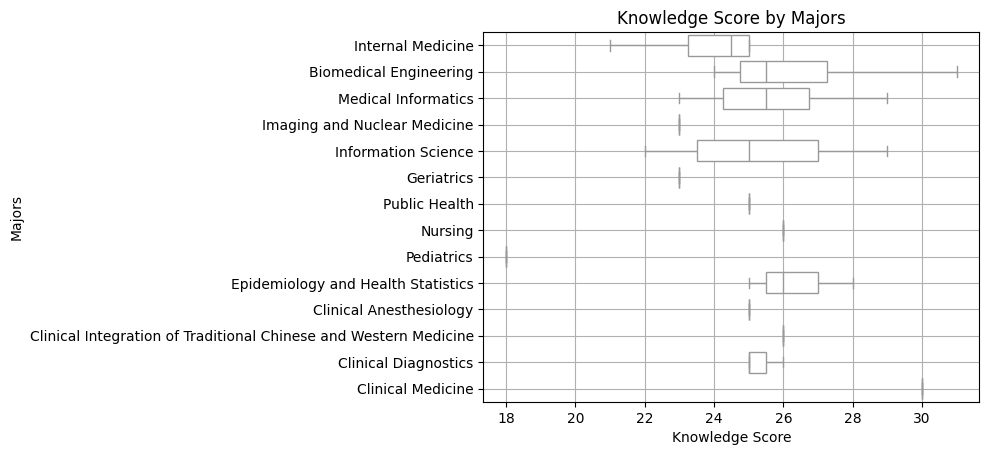

In [27]:
# majors and knowledge_score_sum
distinct_majors = majors.unique()
# print(distinct_majors)
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.serif'] = ['SimHei']
# sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # Change this to the correct path on your system
# font_prop = FontProperties(fname=font_path)
# print(knowledge_score_sum)
# print(type(knowledge_score_sum))
# plt.figure(figsize=(8, 6))
# plt.boxplot(knowledge_score_sum, vert=False)
# plt.yticks(range(1, len(majors) + 1), majors, fontproperties=font_prop)
# # plt.boxplot([knowledge_score_sum[majors == major] for major in distinct_majors], labels=distinct_majors, fontproperties=font_prop)
# plt.show()
# sns.set(font='/System/Library/Fonts/STHeiti Medium.ttc')
print(knowledge_score_sum)
print(majors)
sns.boxplot(x = knowledge_score_sum, y = eng_majors, color='1')
plt.xlabel('Knowledge Score')
plt.grid(True)
plt.ylabel('Majors')
# plt.yticks(fontproperties=font_prop)
plt.title('Knowledge Score by Majors')
plt.show()

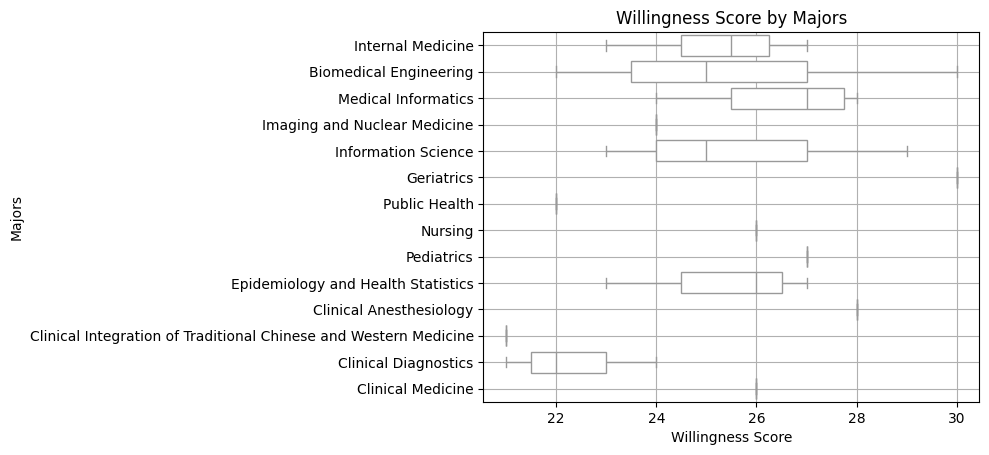

In [29]:
# majors and willingness_score_sum
sns.boxplot(x = willingness_score_sum, y = eng_majors, color='1')
plt.xlabel('Willingness Score')
plt.grid(True)
plt.ylabel('Majors')
# plt.yticks(fontproperties=font_prop)
plt.title('Willingness Score by Majors')
plt.show()